# 1. Explore the data

- Load the data into notebook
- Display initial info (e.g. head( ), describe( ))
- Check null values (i think there's non)
- Clean data
- Visualize numerical variables (histograms to visualize the distribution) - scale the numerical var
- Explore categorical variables (count plots to visualize the distribution) - encode categorical var

## Load the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/Users/clark/Desktop/ironhack/mid project/data_mid_bootcamp_project_regression/regression_data.csv")
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


## Display information

In [3]:
df.shape

(21597, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [5]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


## Check null values

In [6]:
df.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

## Clean the data

## **id**

In [7]:
df['id'].value_counts()

id
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: count, Length: 21420, dtype: int64

In [8]:
# The 'id' column represents unique identification number for the property, as this value doesn't carry any numerical significance, I'm gonna convert it to a categorical type.

df['id'] = df['id'].astype(object)

In [10]:
# Function that cleans the duplicates keeping the rows with the most recent date

def keep_latest_date(df, id_col, date_col):
    
    # Convert the date column to datetime type
    df[date_col] = pd.to_datetime(df[date_col], format='%m/%d/%y')
    
    # Sort the DataFrame by the ID and date columns in descending order
    df.sort_values(by=[id_col, date_col], ascending=False, inplace=True)

    # Drop duplicates, keeping the first (latest) occurrence
    df.drop_duplicates(subset=id_col, keep='first', inplace=True)

    return df

In [29]:
# Applying the function defined above

df1 = df.copy()
df1 = keep_latest_date(cleaned_df, 'id', 'date')

# Filter and display duplicated rows

df1[df1['id'].duplicated() == True]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [30]:
df1['id'].value_counts()

id
9900000190    1
2767603649    1
2767603824    1
2767603890    1
2767603931    1
             ..
6329000190    1
6329000380    1
6329000385    1
6329000705    1
1000102       1
Name: count, Length: 21420, dtype: int64

## date

In [31]:
# Date has already been changed to datetime format

df1.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [9]:
# I will change the 'date' column to an object and also to a datetime format.

df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y', errors='coerce')
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


## bedrooms

In [32]:
df1['bedrooms'].value_counts()

bedrooms
3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
33       1
11       1
Name: count, dtype: int64

In [33]:
# Check the row that has 33 bedrooms

df1[df1["bedrooms"] == 33]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2402100895,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


In [34]:
df2 = df1.copy()

In [35]:
# We are going to drop the row that has 33 bedrooms, because it doesn't add up with the rest of the information

df2 = df1[df1['bedrooms'] != 33]

## bathrooms

In [36]:
df2['bathrooms'].value_counts()

bathrooms
2.50    5352
1.00    3794
1.75    3019
2.25    2031
2.00    1913
1.50    1429
2.75    1182
3.00     747
3.50     729
3.25     586
3.75     155
4.00     134
4.50      99
4.25      79
0.75      70
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.75       1
7.50       1
Name: count, dtype: int64

In [37]:
# Explanation
# 1 -- full bathroom (sink, toilet, tub AND shower)
# 1.25 -- one full bathroom (sink, toilet, tub AND shower) and 1/4 bathroom (toilet)
# 1.5 -- one full bathroom (sink, toilet, tub AND shower) and one half bathroom (toilet and sink)
# 1.75 -- one full bathroom (sink, toilet, tub AND shower) and 3/4 bathroom (sink, toilet tub OR shower)

## sqft_living, sqft_living15, sqft_lot and sqft_lot15

In [38]:
df2[((df2["sqft_living15"] != df2["sqft_living"]) | (df2["sqft_lot15"] != df2["sqft_lot15"])) & (df2["yr_renovated"] == 0)]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15937,9900000190,2014-10-30,3,1.00,1320,8100,1.0,0,0,3,...,880,440,1943,0,98166,47.4697,-122.351,1000,8100,268950
20963,9895000040,2014-07-03,2,1.75,1410,1005,1.5,0,0,3,...,900,510,2011,0,98027,47.5446,-122.018,1440,1188,399900
7614,9842300540,2014-06-24,3,1.00,1100,4128,1.0,0,0,4,...,720,380,1942,0,98126,47.5296,-122.379,1510,4538,339000
3257,9842300485,2015-03-11,2,1.00,1040,7372,1.0,0,0,5,...,840,200,1939,0,98126,47.5285,-122.378,1930,5150,380000
16723,9842300095,2014-07-25,5,2.00,1600,4168,1.5,0,0,3,...,1600,0,1927,0,98126,47.5297,-122.381,1190,4168,365000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18506,3600072,2015-03-30,4,2.75,2220,5310,1.0,0,0,5,...,1170,1050,1951,0,98144,47.5801,-122.294,1540,4200,680000
8800,2800031,2015-04-01,3,1.00,1430,7599,1.5,0,0,4,...,1010,420,1930,0,98168,47.4783,-122.265,1290,10320,235000
8404,1200021,2014-08-11,3,1.00,1460,43000,1.0,0,0,3,...,1460,0,1952,0,98166,47.4434,-122.347,2250,20023,400000
6729,1200019,2014-05-08,4,1.75,2060,26036,1.0,0,0,4,...,1160,900,1947,0,98166,47.4444,-122.351,2590,21891,647500


In [39]:
# Dropping the column yr_renovated as 18033 rows have experienced a renovation but the year renovated shows as 0

df2 = df2.drop('yr_renovated', axis=1)

In [40]:
# Checking which houses have experienced a renovation  

df2['sqft_living_diff'] = df2['sqft_living'] - df2['sqft_living15']
df2['sqft_lot_diff'] = df2['sqft_lot'] - df2['sqft_lot15']

df2

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,sqft_living_diff,sqft_lot_diff
15937,9900000190,2014-10-30,3,1.00,1320,8100,1.0,0,0,3,...,440,1943,98166,47.4697,-122.351,1000,8100,268950,320,0
20963,9895000040,2014-07-03,2,1.75,1410,1005,1.5,0,0,3,...,510,2011,98027,47.5446,-122.018,1440,1188,399900,-30,-183
7614,9842300540,2014-06-24,3,1.00,1100,4128,1.0,0,0,4,...,380,1942,98126,47.5296,-122.379,1510,4538,339000,-410,-410
3257,9842300485,2015-03-11,2,1.00,1040,7372,1.0,0,0,5,...,200,1939,98126,47.5285,-122.378,1930,5150,380000,-890,2222
16723,9842300095,2014-07-25,5,2.00,1600,4168,1.5,0,0,3,...,0,1927,98126,47.5297,-122.381,1190,4168,365000,410,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,3600057,2015-03-19,4,2.00,1650,3504,1.0,0,0,3,...,890,1951,98144,47.5803,-122.294,1480,3504,402500,170,0
8800,2800031,2015-04-01,3,1.00,1430,7599,1.5,0,0,4,...,420,1930,98168,47.4783,-122.265,1290,10320,235000,140,-2721
8404,1200021,2014-08-11,3,1.00,1460,43000,1.0,0,0,3,...,0,1952,98166,47.4434,-122.347,2250,20023,400000,-790,22977
6729,1200019,2014-05-08,4,1.75,2060,26036,1.0,0,0,4,...,900,1947,98166,47.4444,-122.351,2590,21891,647500,-530,4145


## floors

In [41]:
df2['floors'].value_counts()

floors
1.0    10551
2.0     8203
1.5     1888
3.0      609
2.5      161
3.5        7
Name: count, dtype: int64

In [16]:
# Explanation
# 1.5 a one story home with a partial second floor added to allow for more space

## view

In [42]:
df2['view'].value_counts()

view
0    19305
2      960
3      507
1      331
4      316
Name: count, dtype: int64

In [43]:
# Explanation
# 0 bad views and 4 excellent views

## condition

In [44]:
df2['condition'].value_counts()

condition
3    13900
4     5643
5     1686
2      162
1       28
Name: count, dtype: int64

In [20]:
# Explanation
# 1 worn-out and 5 excellent

## grade

In [45]:
df2['grade'].value_counts()

grade
7     8888
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: count, dtype: int64

In [22]:
# Explanation 
# 1 poor and 13 excellent

## sqft_above

In [46]:
df2['sqft_above'].value_counts()

sqft_above
1300    210
1010    204
1200    203
1220    186
1140    183
       ... 
5060      1
2793      1
3265      1
8020      1
2341      1
Name: count, Length: 942, dtype: int64

In [47]:
# Explanation
# Square footage of house apart from the basement

## sqft_basement

In [57]:
df2['sqft_basement'].value_counts()

sqft_basement
0       12999
600       220
700       215
500       211
800       206
        ...  
2580        1
2130        1
2590        1
784         1
875         1
Name: count, Length: 306, dtype: int64

In [61]:
def check_sum_equal(df2, col1, col2, col_to_check):
    result_indices = []
    
    for index, row in df2.iterrows():
        sum_value = row[col1] + row[col2]
        if sum_value == row[col_to_check]:
            result_indices.append(index)
    
    return result_indices

print(check_sum_equal(df2, 'sqft_above', 'sqft_basement', 'sqft_lot15'))

[10639, 16826, 13360]


## yr_built

In [62]:
df2['yr_built'].value_counts()

yr_built
2014    559
2006    453
2005    450
2004    429
2003    420
       ... 
1933     29
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64

## zipcode

In [64]:
df2['zipcode'].value_counts()

zipcode
98103    599
98038    586
98115    576
98052    571
98117    548
        ... 
98102    104
98010     99
98024     79
98148     56
98039     49
Name: count, Length: 70, dtype: int64

## lat and long

In [65]:
df3 = df2.copy()

In [66]:
# Add column with lat and long together

df3['lat_long'] = df3['lat'].astype(str) + ',' + ' ' + df3['long'].astype(str)
df3

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,sqft_living_diff,sqft_lot_diff,lat_long
15937,9900000190,2014-10-30,3,1.00,1320,8100,1.0,0,0,3,...,1943,98166,47.4697,-122.351,1000,8100,268950,320,0,"47.4697, -122.351"
20963,9895000040,2014-07-03,2,1.75,1410,1005,1.5,0,0,3,...,2011,98027,47.5446,-122.018,1440,1188,399900,-30,-183,"47.5446, -122.018"
7614,9842300540,2014-06-24,3,1.00,1100,4128,1.0,0,0,4,...,1942,98126,47.5296,-122.379,1510,4538,339000,-410,-410,"47.5296, -122.379"
3257,9842300485,2015-03-11,2,1.00,1040,7372,1.0,0,0,5,...,1939,98126,47.5285,-122.378,1930,5150,380000,-890,2222,"47.5285, -122.378"
16723,9842300095,2014-07-25,5,2.00,1600,4168,1.5,0,0,3,...,1927,98126,47.5297,-122.381,1190,4168,365000,410,0,"47.5297, -122.381"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,3600057,2015-03-19,4,2.00,1650,3504,1.0,0,0,3,...,1951,98144,47.5803,-122.294,1480,3504,402500,170,0,"47.5803, -122.294"
8800,2800031,2015-04-01,3,1.00,1430,7599,1.5,0,0,4,...,1930,98168,47.4783,-122.265,1290,10320,235000,140,-2721,"47.4783, -122.265"
8404,1200021,2014-08-11,3,1.00,1460,43000,1.0,0,0,3,...,1952,98166,47.4434,-122.347,2250,20023,400000,-790,22977,"47.4434, -122.347"
6729,1200019,2014-05-08,4,1.75,2060,26036,1.0,0,0,4,...,1947,98166,47.4444,-122.351,2590,21891,647500,-530,4145,"47.4444, -122.351"


In [68]:
# Create a function to replace the lat/long with the region/city

!pip install geopy
from geopy.geocoders import Nominatim

  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 5.9 MB/s eta 0:00:00


## price

In [69]:
df3['price'].value_counts()

price
450000    172
350000    167
550000    157
500000    151
425000    149
         ... 
440150      1
449250      1
358803      1
278750      1
872750      1
Name: count, Length: 3595, dtype: int64

## Final dataframe

In [70]:
df3

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,sqft_living_diff,sqft_lot_diff,lat_long
15937,9900000190,2014-10-30,3,1.00,1320,8100,1.0,0,0,3,...,1943,98166,47.4697,-122.351,1000,8100,268950,320,0,"47.4697, -122.351"
20963,9895000040,2014-07-03,2,1.75,1410,1005,1.5,0,0,3,...,2011,98027,47.5446,-122.018,1440,1188,399900,-30,-183,"47.5446, -122.018"
7614,9842300540,2014-06-24,3,1.00,1100,4128,1.0,0,0,4,...,1942,98126,47.5296,-122.379,1510,4538,339000,-410,-410,"47.5296, -122.379"
3257,9842300485,2015-03-11,2,1.00,1040,7372,1.0,0,0,5,...,1939,98126,47.5285,-122.378,1930,5150,380000,-890,2222,"47.5285, -122.378"
16723,9842300095,2014-07-25,5,2.00,1600,4168,1.5,0,0,3,...,1927,98126,47.5297,-122.381,1190,4168,365000,410,0,"47.5297, -122.381"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,3600057,2015-03-19,4,2.00,1650,3504,1.0,0,0,3,...,1951,98144,47.5803,-122.294,1480,3504,402500,170,0,"47.5803, -122.294"
8800,2800031,2015-04-01,3,1.00,1430,7599,1.5,0,0,4,...,1930,98168,47.4783,-122.265,1290,10320,235000,140,-2721,"47.4783, -122.265"
8404,1200021,2014-08-11,3,1.00,1460,43000,1.0,0,0,3,...,1952,98166,47.4434,-122.347,2250,20023,400000,-790,22977,"47.4434, -122.347"
6729,1200019,2014-05-08,4,1.75,2060,26036,1.0,0,0,4,...,1947,98166,47.4444,-122.351,2590,21891,647500,-530,4145,"47.4444, -122.351"


In [32]:
df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'sqft_living_diff',
       'sqft_lot_diff', 'lat_long'],
      dtype='object')

In [33]:
df1 = df.copy()

In [35]:
# Re-order the columns

new_order = ['id', 'date', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'lat_long', 'price', 'sqft_living', 'sqft_lot', 'sqft_living_diff',
       'sqft_lot_diff', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

df1 = df1[new_order]
df1

,id,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,...,lat_long,price,sqft_living,sqft_lot,sqft_living_diff,sqft_lot_diff,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,3,1.00,1.0,0,0,3,7,1955,...,"47.5112,-122.257",221900,1180,5650,-160,0,1180,0,1340,5650
1,6414100192,2014-12-09,3,2.25,2.0,0,0,3,7,1951,...,"47.721,-122.319",538000,2570,7242,880,-397,2170,400,1690,7639
2,5631500400,2015-02-25,2,1.00,1.0,0,0,3,6,1933,...,"47.7379,-122.233",180000,770,10000,-1950,1938,770,0,2720,8062
3,2487200875,2014-12-09,4,3.00,1.0,0,0,5,7,1965,...,"47.5208,-122.393",604000,1960,5000,600,0,1050,910,1360,5000
4,1954400510,2015-02-18,3,2.00,1.0,0,0,3,8,1987,...,"47.6168,-122.045",510000,1680,8080,-120,577,1680,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,3.0,0,0,3,8,2009,...,"47.6993,-122.346",360000,1530,1131,0,-378,1530,0,1530,1509
21593,6600060120,2015-02-23,4,2.50,2.0,0,0,3,8,2014,...,"47.5107,-122.362",400000,2310,5813,480,-1387,2310,0,1830,7200
21594,1523300141,2014-06-23,2,0.75,2.0,0,0,3,7,2009,...,"47.5944,-122.299",402101,1020,1350,0,-657,1020,0,1020,2007
21595,291310100,2015-01-16,3,2.50,2.0,0,0,3,8,2004,...,"47.5345,-122.069",400000,1600,2388,190,1101,1600,0,1410,1287


## Numerical variables

In [55]:
numericals = ['bedrooms', 'bathrooms', 'floors', 'price', 'sqft_living', 'sqft_lot', 'sqft_living_diff', 'sqft_lot_diff', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

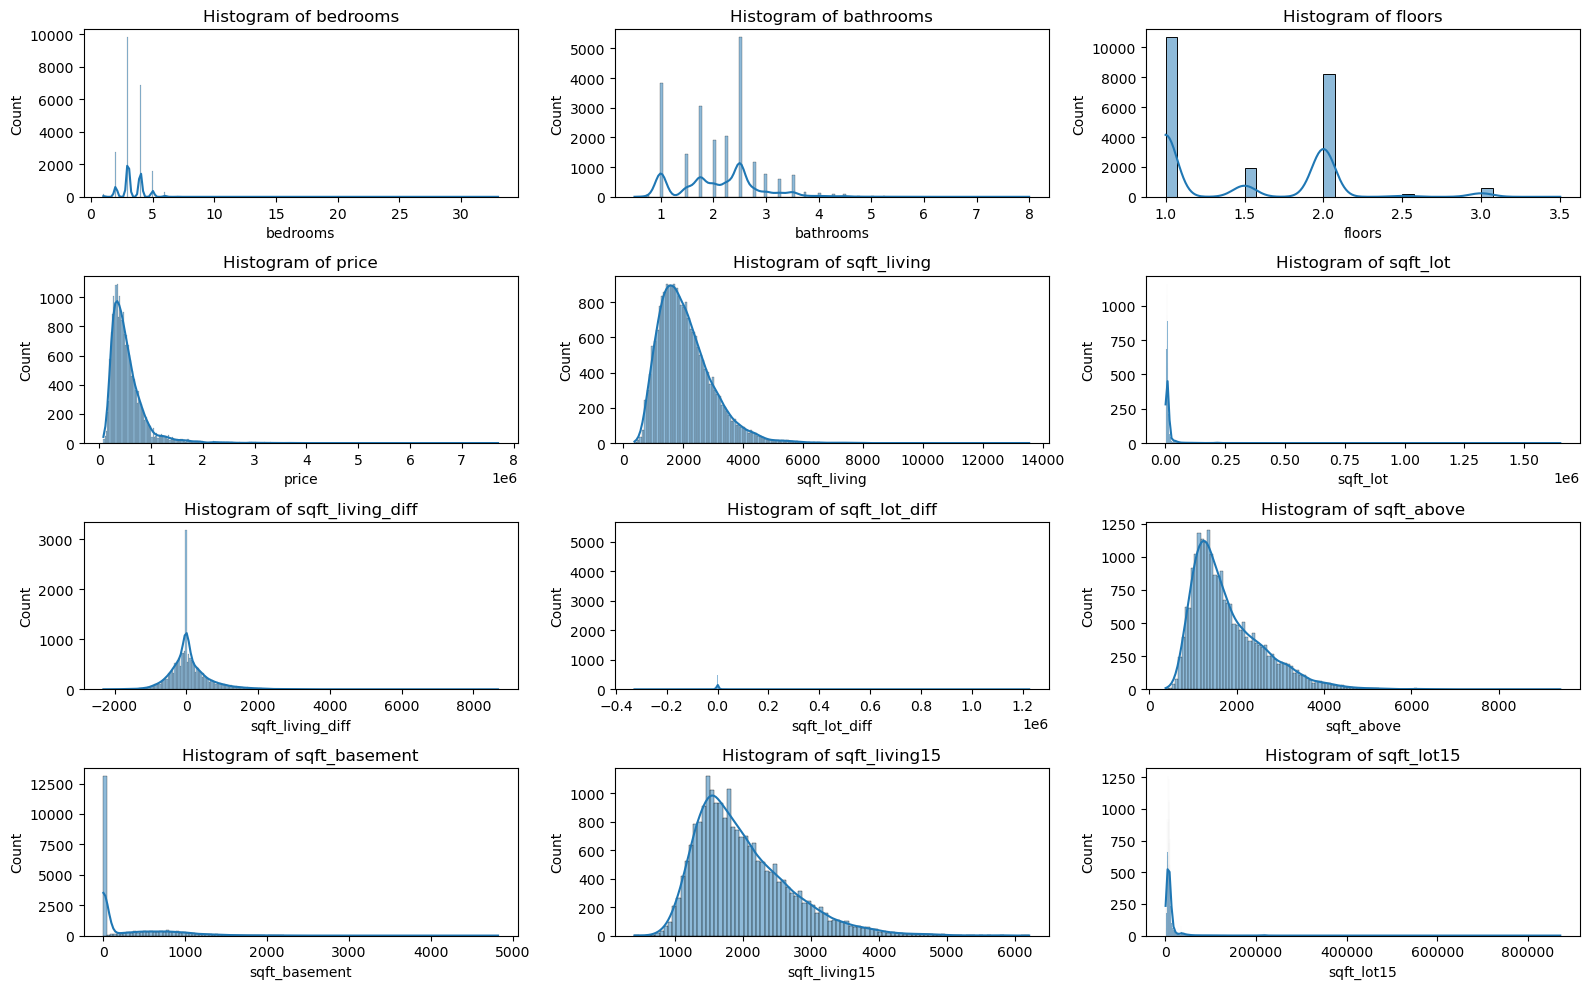

In [58]:
# Visualize numerical variables using histograms

plt.figure(figsize=(16, 10))

for column in numericals:
    plt.subplot(4, 3, numericals.index(column) + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

In [45]:
# Scale the numerical values

scaler = StandardScaler()
df1[numericals] = scaler.fit_transform(df[numericals])

## Categorical variables

In [51]:
categoricals = ['date', 'waterfront', 'view', 'condition', 'grade', 
                'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'lat_long']

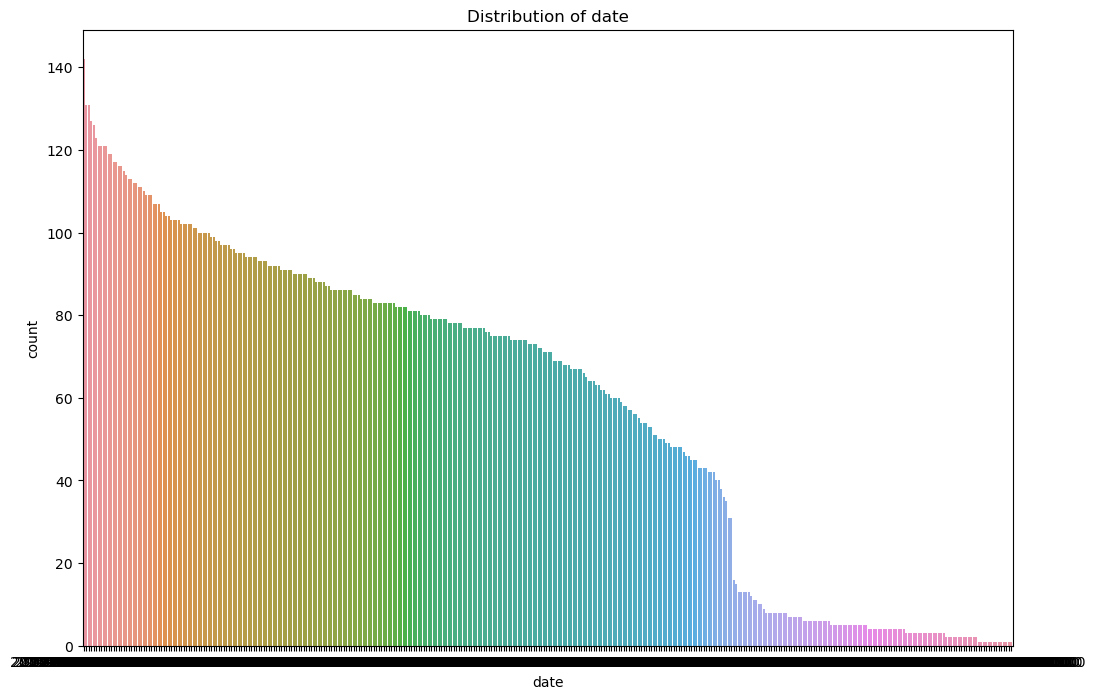

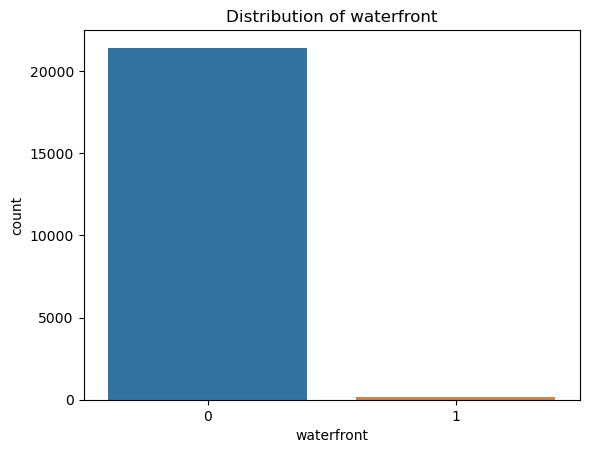

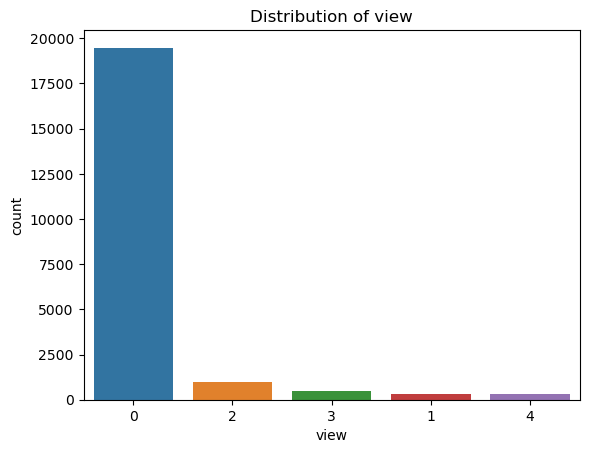

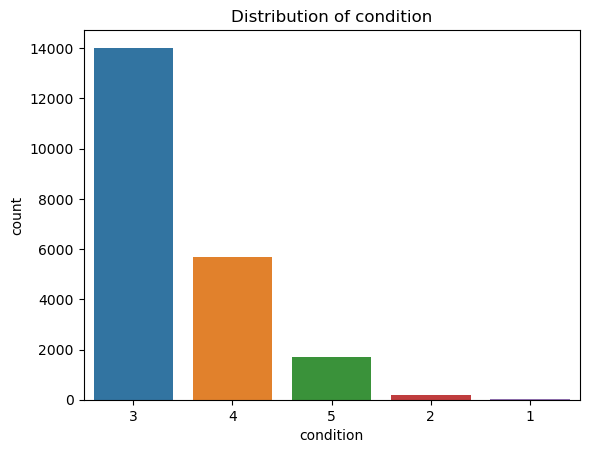

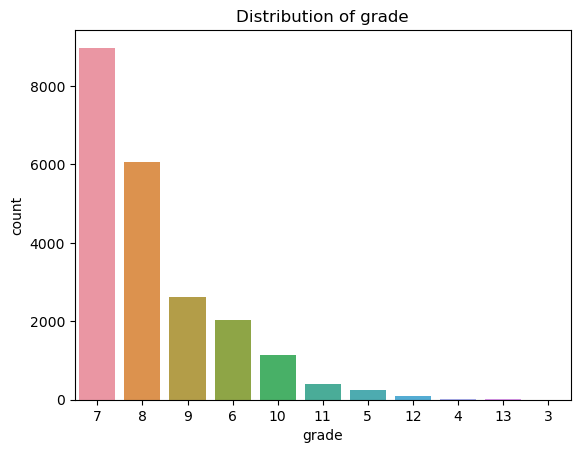

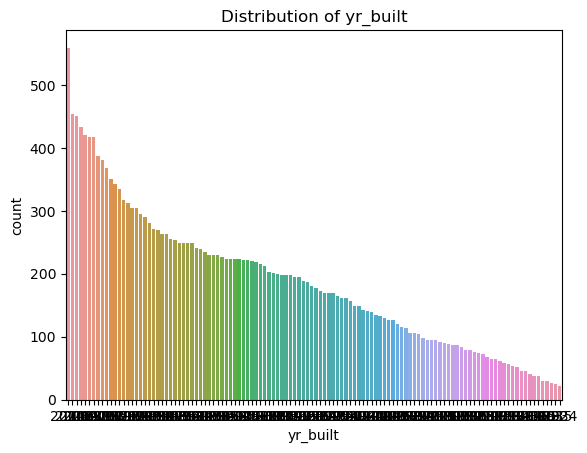

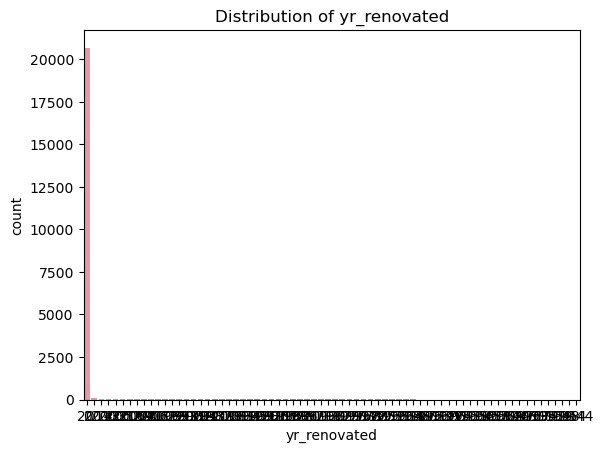

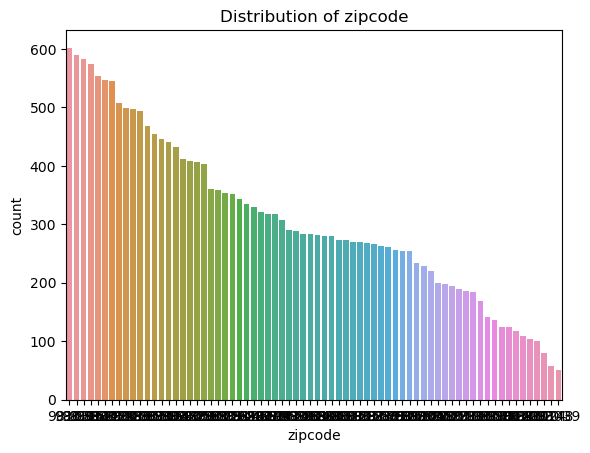

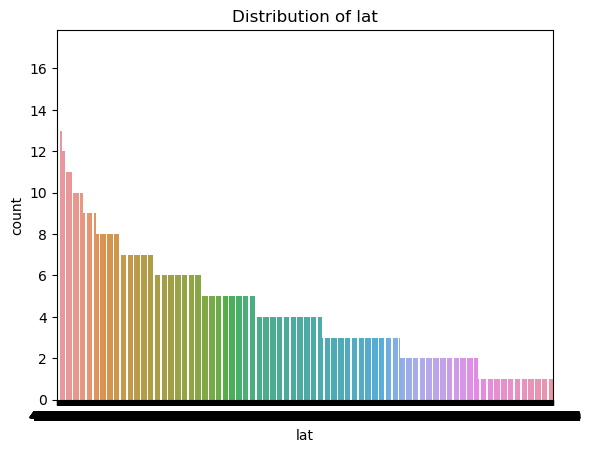

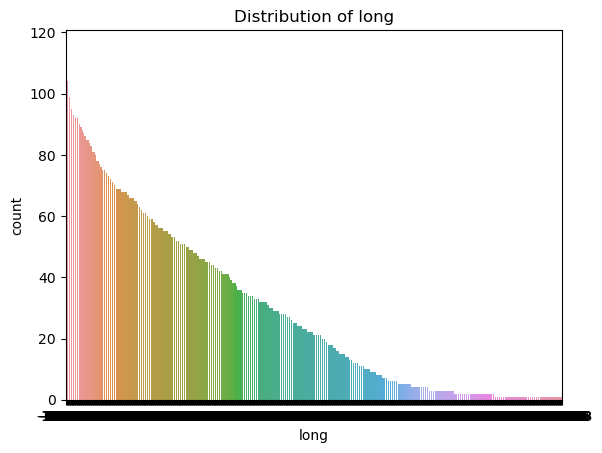

In [ ]:
# Explore categorical variables using count plots

plt.figure(figsize=(12, 8))
for column in categoricals:
    sns.countplot(x=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.show()
